In [78]:
# import packages
import pandas as pd
import numpy as np

In [79]:
# 1
# load in data
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv', low_memory=False)

df = df.drop('time', axis=1) # removes the time column/variable from the dataframe

print(df.shape) # list dimensions of dataframe(rows=observations, columns=variables)
df.head(10) # shows me first 10 rows of data

(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,1


In [80]:
df.describe()

# no NA's since count 299 = row/obersvation numer 299

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [81]:
# 2
df.corr() # make a correlation matrix

# variables strongly associated with a death event:
# age = 0.253729
# serum_creatinine = 0.294278
# ejection_fraction = -0.268603	(negative correlation)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [82]:
# 3
# For the dummy variables anaemia, diabetes,
# high_blood_pressure, sex, and smoking, compute a summary table of DEATH_EVENT grouped by the variable.
vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for var in vars:
    print(df.loc[:,[var,'DEATH_EVENT']].groupby(var).describe())  # summary table

# For which variables does a higher proportion of the population die when
# the variable takes the value 1 rather than 0?
# looking at mean: amenia & high blood pressure
# diabetes, sex, and smoking all about the same

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

In [83]:
# 4
# On the basis of your answers from 2 and 3, build a matrix  X  of the variables
# you think are most predictive of a death, and a variable  y  equal to DEATH_EVENT.

# matrix X therefore would contain anemia,  high BP (from Q3) and
# age, serum_creatinine, ejection_fraction (from Q2)

vars = ['anaemia','high_blood_pressure','age','serum_creatinine', 'ejection_fraction']
X = df.loc[:,vars]
y = df['DEATH_EVENT']

print(X, '\n', y)

     anaemia  high_blood_pressure   age  serum_creatinine  ejection_fraction
0          0                    1  75.0               1.9                 20
1          0                    0  55.0               1.1                 38
2          0                    0  65.0               1.3                 20
3          1                    0  50.0               1.9                 20
4          1                    0  65.0               2.7                 20
..       ...                  ...   ...               ...                ...
294        0                    1  62.0               1.1                 38
295        0                    0  55.0               1.2                 38
296        0                    0  45.0               0.8                 60
297        0                    0  45.0               1.4                 38
298        0                    0  50.0               1.6                 45

[299 rows x 5 columns] 
 0      1
1      1
2      1
3      1
4      1
     

In [84]:
# 5
# Maxmin normalize all of the variables in `X`.
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

In [75]:
# 6
# Split the sample into ~80% for training and ~20% for evaluation.
#(Try to use the same train/test split for the whole question,
#so that you're comparing apples to apples in the questions below.).

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)



In [85]:
#another way of doing it than from question 1 without the sklearn package - kept giving me a k of 34
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set from 80% of N
test = [item for item in all if item not in train] # Find test indices - i.e the 20% that is not

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[34]


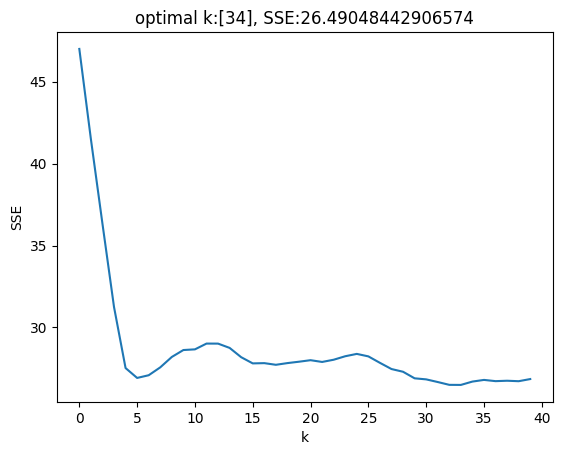

In [86]:
# 7
# Determine the optimal number of neighbors for a  k NN regression for the variables you selected.

# imports appropriate packages
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

k_bar = 40 # number of k's to try
k_grid = np.arange(1,k_bar) # The range of k's to consider from 1 to k_bar set
SSE = np.zeros(k_bar) # stores SSE for k's

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)  # fits model using the training set(80%)
    y_hat = knn.predict(X_test) # creates predition values using test set (20%) and store as 'y_yat'
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # compues k's SSE's ad stores in SSE matrix made earlier

SSE_min = np.min(SSE) # lowest recorded SSE = most accurate
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # finds the (index) optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # plots SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

In [93]:
# 8
# OK, do steps 5 through 7 again, but use all of the variables (except time)

vars = ['age',	'anaemia',	'creatinine_phosphokinase',	'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking']
X = df.loc[:,vars]
y = df['DEATH_EVENT']



In [94]:
# maxmin normalize all of the variables in `X`.
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

In [89]:
# Split the sample into ~80% for training and ~20% for evaluation.
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [95]:
#another way of doing it than from question 1 without the sklearn package - kept giving me a k of 34
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set from 80% of N
test = [item for item in all if item not in train] # Find test indices - i.e the 20% that is not

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[30]


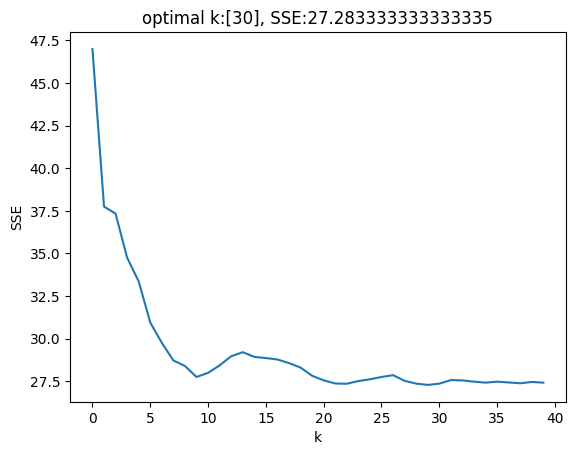

In [96]:
# Determine the optimal number of neighbors for a  k NN regression for the variables you selected.

k_bar = 40 # number of k's to try
k_grid = np.arange(1,k_bar) # The range of k's to consider from 1 to k_bar set
SSE = np.zeros(k_bar) # stores SSE for k's

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)  # fits model using the training set(80%)
    y_hat = knn.predict(X_test) # creates predition values using test set (20%) and store as 'y_yat'
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # compues k's SSE's ad stores in SSE matrix made earlier

SSE_min = np.min(SSE) # lowest recorded SSE = most accurate
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # finds the (index) optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # plots SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

In [ ]:

# Which model has a lower Sum of Squared Error? the one with less variables with SSE ~26 vs. ~27
# Which would you prefer to use in practice, if you had to predict DEATH_EVENTs? the one with less variable,
# since it is also incorporating the more strongly correlated variables
# If you play with the selection of variables, how much does the SSE change for your
# fitted model on the test data? SSE's only off by usually one number
# Are more variables always better? Explain your findings. No, less variables and fewer neighbors usually
# does a better job predicting